<center><h1>Assignment 3</h1></center>




- **Name: Udit Singh**
- **Roll No: 2018IMT-101**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 2 October September 2021**

Importing necessary library for generating datasets and implementing the linear and polynomial models.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


Generating the dataset

In [4]:
X = np.random.uniform(0, 1, 50)            
noise = np.random.normal(0, 0.032, 50)

y_1 = np.sin(1 + np.power(X, 2)) + noise  # noise
y_2 = np.sin(1 + np.power(X, 2)) # noise free

X = X.reshape(-1, 1)
y_1 = y_1.reshape(-1, 1)
y_2 = y_2.reshape(-1, 1)

Splitting our dataset into train and test sample data

In [5]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y_1,test_size=0.2)
X_train, X_test, y2_train, y2_test = train_test_split(X, y_2,test_size=0.2)

**Exploratory Data Analysis**

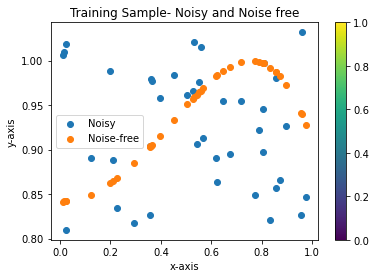

In [12]:
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.title('Training Sample- Noisy and Noise free')
plt.scatter(X_train, y1_train, label = "Noisy", cmap="oranges")
plt.scatter(X_train, y2_train, label = "Noise-free", cmap="oranges")
plt.legend()
plt.colorbar()
plt.show()

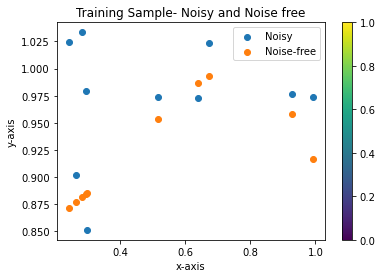

In [13]:
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.title('Training Sample- Noisy and Noise free')
plt.scatter(X_test, y1_test, label = "Noisy", cmap="BuPu")
plt.scatter(X_test, y2_test, label = "Noise-free",cmap="BuPu")
plt.legend()
plt.colorbar()
plt.show()


**Linear Regression**

In [14]:
def predict(x, theta):
    return np.dot(x, theta)

def getThetaClosedForm(x, y):
    y = np.mat(y)
    first = np.dot(x.T, x)
    second = np.dot(x.T, y)
    
    theta = np.linalg.pinv(first) * second
    
    return theta

In [16]:
ones = np.ones((X_train.shape[0], 1))
x_ = np.hstack((X_train, ones))

theta = getThetaClosedForm(x_, y2_train)
print(theta)

[[0.16192962]
 [0.85113756]]


### Evaluating our sample data on Linear Regression model

In [20]:
y2_pred_train = predict(x_, theta)
rmse1 = np.sqrt(metrics.mean_squared_error(y2_train, y2_pred_train))



# Applying linear regression on test data 


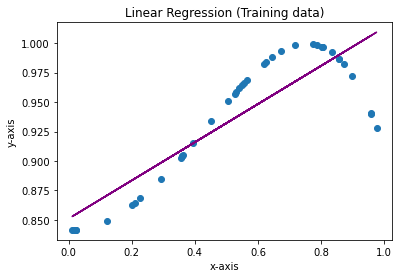

RMSE for training data = 0.026964072854412647


In [24]:
plt.title('Linear Regression (Training data)')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.plot(X_train, y2_pred_train, color = 'purple')
plt.scatter(X_train, y2_train)
plt.show()

print("RMSE for training data =", rmse1)

Test Data Metrics

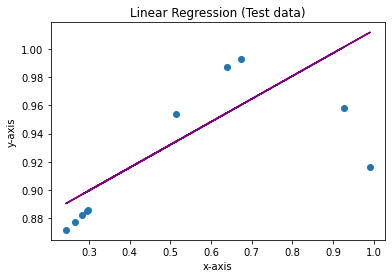

RMSE for test data = 0.03824797082125444


In [25]:
ones_2 = np.ones((X_test.shape[0], 1))
x_2 = np.hstack((X_test, ones_2))

y2_pred_test = predict(x_2, theta)
rmse2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))

plt.title('Linear Regression (Test data)')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.plot(X_test, y2_pred_test, color = 'purple')
plt.scatter(X_test, y2_test, cmap='reds')
plt.show()

print("RMSE for test data =", rmse2)

**Applying Polynomial regression(degree = 2) on training and test data**


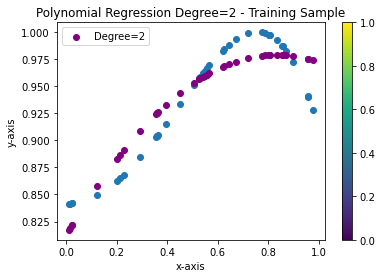

RMSE for training data = 0.019213952421314136


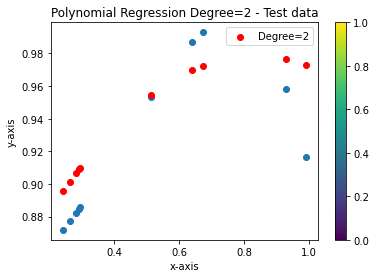

RMSE for test data = 0.02673027807123286


In [27]:
poly2 = PolynomialFeatures(degree = 2)
X_poly2 = poly2.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly2, y2_train)

# Training data
y21_pred = lin2.predict(poly2.fit_transform(X_train));

plt.title('Polynomial Regression Degree=2 - Training Sample')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.scatter(X_train, y2_train)
plt.scatter(X_train, y21_pred, color = 'purple', label = "Degree=2")
plt.colorbar()
plt.legend()
plt.show()

rmsePoly21 = np.sqrt(metrics.mean_squared_error(y2_train, y21_pred))
print("RMSE for training data =", rmsePoly21)

# Test data
y22_pred = lin2.predict(poly2.fit_transform(X_test));

plt.title('Polynomial Regression Degree=2 - Test data')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.scatter(X_test, y2_test)
plt.scatter(X_test, y22_pred, color = 'red', label = "Degree=2")
plt.colorbar()
plt.legend()
plt.show()

rmsePoly22 = np.sqrt(metrics.mean_squared_error(y2_test, y22_pred))
print("RMSE for test data =", rmsePoly22)

**Applying Polynomial regression(degree = 3) on training and test data**

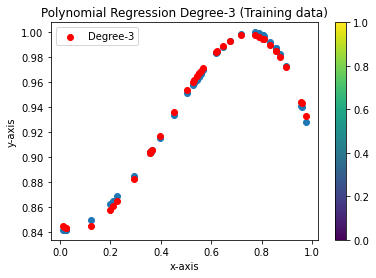

RMSE for training data = 0.0025286821010882645


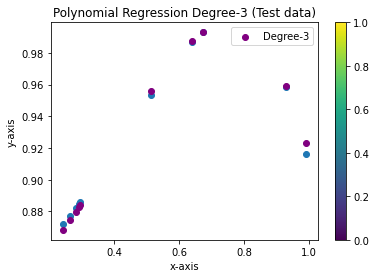

RMSE for test data = 0.002928001754371941


In [31]:
poly3 = PolynomialFeatures(degree = 3)
X_poly3 = poly3.fit_transform(X_train)

lin3 = LinearRegression()
lin3.fit(X_poly3, y2_train)

# Training data
y31_pred = lin3.predict(poly3.fit_transform(X_train));

plt.title('Polynomial Regression Degree-3 (Training data)')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.scatter(X_train, y2_train)
plt.scatter(X_train, y31_pred, color = 'red', label = 'Degree-3')
plt.colorbar()
plt.legend()
plt.show()

rmsePoly31 = np.sqrt(metrics.mean_squared_error(y2_train, y31_pred))
print("RMSE for training data =", rmsePoly31)

# Test data
y32_pred = lin3.predict(poly3.fit_transform(X_test));

plt.title('Polynomial Regression Degree-3 (Test data)')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.scatter(X_test, y2_test)
plt.scatter(X_test, y32_pred, color = 'purple', label = 'Degree-3')
plt.colorbar()
plt.legend()
plt.show()

rmsePoly32 = np.sqrt(metrics.mean_squared_error(y2_test, y32_pred))
print("RMSE for test data =", rmsePoly32)

**Applying Polynomial regression(degree = 4) on training and test data**

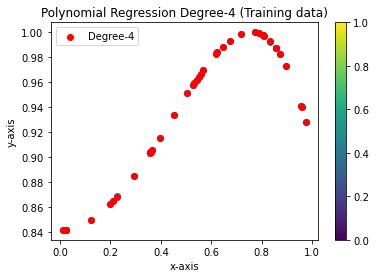

RMSE for training data = 8.499885625774414e-05


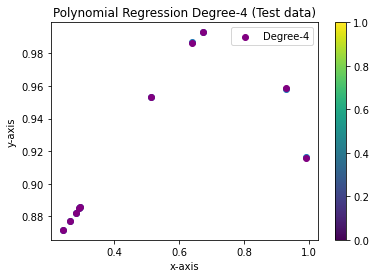

RMSE for test data = 0.00016433327283685737


In [32]:
poly4 = PolynomialFeatures(degree = 4)
X_poly4 = poly4.fit_transform(X_train)

lin4 = LinearRegression()
lin4.fit(X_poly4, y2_train)

# Training data
y41_pred = lin4.predict(poly4.fit_transform(X_train));

plt.title('Polynomial Regression Degree-4 (Training data)')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.scatter(X_train, y2_train)
plt.scatter(X_train, y41_pred, color = 'red', label = 'Degree-4')
plt.colorbar()
plt.legend()
plt.show()

rmsePoly41 = np.sqrt(metrics.mean_squared_error(y2_train, y41_pred))
print("RMSE for training data =", rmsePoly41)

# Test data
y42_pred = lin4.predict(poly4.fit_transform(X_test));

plt.title('Polynomial Regression Degree-4 (Test data)')
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.scatter(X_test, y2_test)
plt.scatter(X_test, y42_pred, color = 'purple', label = 'Degree-4')
plt.colorbar()
plt.legend()
plt.show()

rmsePoly42 = np.sqrt(metrics.mean_squared_error(y2_test, y42_pred))
print("RMSE for test data =", rmsePoly42)